 # FORECASTING DENGAN LSTM dan SimpleRNN Saham TLKM.JK
Kelas : UG-10
Kelompok 5 
1. Adelia Putri Hapsari
2. Defrian Afandi
3. Putri Beliani

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#import data
df = pd.read_csv('TLKM.JK.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-02,3470.0,3550.0,3440.0,3440.0,3116.205811,96802900
1,2020-03-03,3510.0,3660.0,3470.0,3620.0,3279.262939,114698200
2,2020-03-04,3640.0,3840.0,3630.0,3830.0,3469.496582,136081000
3,2020-03-05,3820.0,3880.0,3760.0,3830.0,3469.496582,101235000
4,2020-03-06,3730.0,3790.0,3710.0,3750.0,3397.026611,86476000
...,...,...,...,...,...,...,...
408,2021-11-08,3780.0,3780.0,3710.0,3750.0,3750.000000,58758600
409,2021-11-09,3730.0,3740.0,3680.0,3710.0,3710.000000,92427800
410,2021-11-10,3670.0,3720.0,3670.0,3700.0,3700.000000,53511200
411,2021-11-11,3700.0,3730.0,3640.0,3650.0,3650.000000,95789600


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       413 non-null    object 
 1   Open       413 non-null    float64
 2   High       413 non-null    float64
 3   Low        413 non-null    float64
 4   Close      413 non-null    float64
 5   Adj Close  413 non-null    float64
 6   Volume     413 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 22.7+ KB


In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,413.000000,413.000000,413.000000,413.000000,413.000000,4.130000e+02
mean,3241.307506,3286.246973,3194.116223,3237.142857,3097.506067,1.280827e+08
std,269.673904,268.737984,273.407136,274.282951,314.664342,7.767769e+07
min,2550.000000,2590.000000,2450.000000,2560.000000,2373.389404,0.000000e+00
25%,3100.000000,3130.000000,3050.000000,3080.000000,2875.031494,7.730690e+07
50%,3260.000000,3300.000000,3200.000000,3250.000000,3103.510742,1.089886e+08
75%,3400.000000,3440.000000,3360.000000,3400.000000,3303.430176,1.597765e+08
max,3860.000000,3880.000000,3820.000000,3870.000000,3870.000000,6.241426e+08


In [5]:
df1 = df.drop('Volume', axis=1)
df1

,Date,Open,High,Low,Close,Adj Close
0,2020-03-02,3470.0,3550.0,3440.0,3440.0,3116.205811
1,2020-03-03,3510.0,3660.0,3470.0,3620.0,3279.262939
2,2020-03-04,3640.0,3840.0,3630.0,3830.0,3469.496582
3,2020-03-05,3820.0,3880.0,3760.0,3830.0,3469.496582
4,2020-03-06,3730.0,3790.0,3710.0,3750.0,3397.026611
...,...,...,...,...,...,...
408,2021-11-08,3780.0,3780.0,3710.0,3750.0,3750.000000
409,2021-11-09,3730.0,3740.0,3680.0,3710.0,3710.000000
410,2021-11-10,3670.0,3720.0,3670.0,3700.0,3700.000000
411,2021-11-11,3700.0,3730.0,3640.0,3650.0,3650.000000


Text(0.5, 1.0, 'General Statistic of Saham PT Telekomunikasi Indonesia')

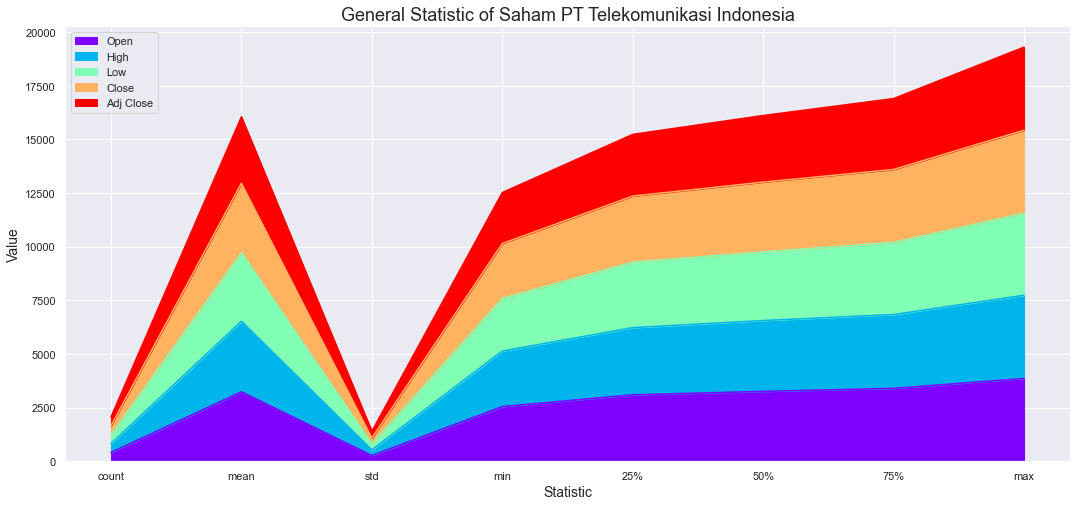

In [6]:
#melakukan visualisasi dari data describe

df1.describe().plot(kind='area', figsize = (18,8), colormap='rainbow')
plt.xlabel('Statistic', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title("General Statistic of Saham PT Telekomunikasi Indonesia", fontsize=18)

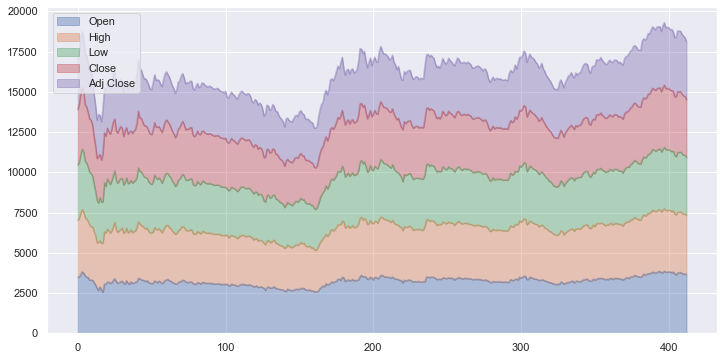

In [7]:
#visualisasi area plot

df1.plot.area(y=['Open','High','Low','Close','Adj Close'], alpha=0.4, figsize=(12,6));

In [8]:
df1.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
dtype: int64

In [9]:
#Korelasi dengan heatmap
korelasi = df.corr()
korelasi1 = korelasi.index

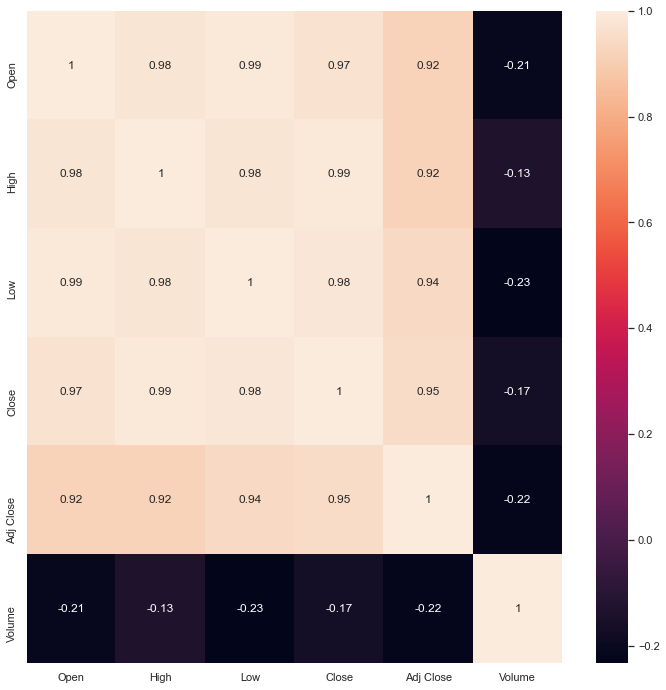

In [10]:
plt.figure(figsize=(12,12))
g=sns.heatmap(df[korelasi1].corr(),annot=True)

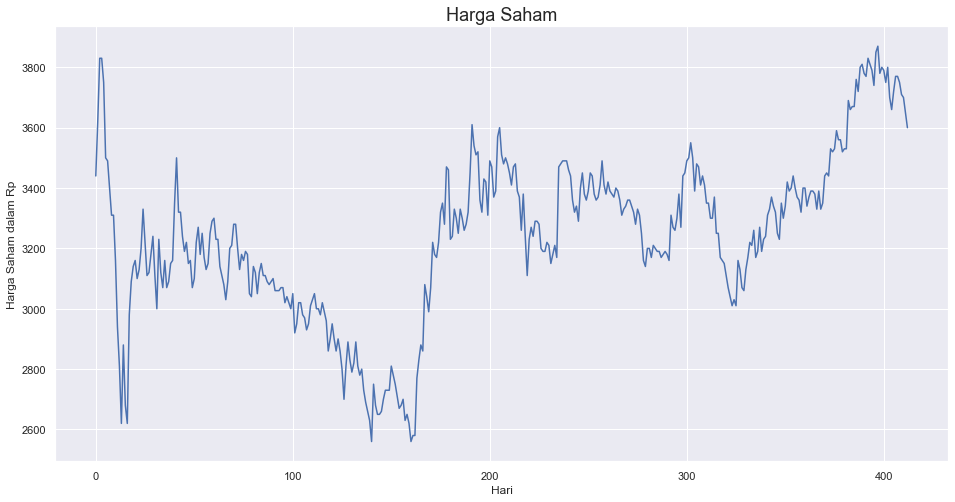

In [11]:
#Plot time series dari harga saham -- diambil harga penutupan (Close)
plt.figure(figsize=(16,8))
plt.title('Harga Saham', fontsize = 18)
plt.plot(df['Close'])
plt.xlabel('Hari', fontsize=12)
plt.ylabel('Harga Saham dalam Rp', fontsize=12)
plt.show()

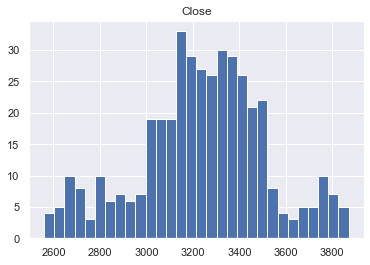

In [12]:
df.hist(column='Close', bins=30)
plt.show()

<AxesSubplot:ylabel='Close'>

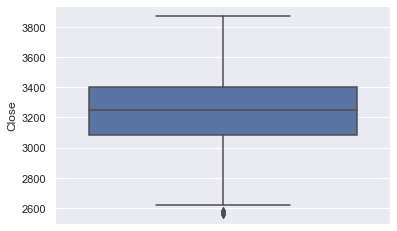

In [13]:
sns.boxplot(y='Close', data=df)

# Forecasting dengan LSTM

In [14]:
from numpy import array
import math
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM,Input

In [15]:
#akan diprediksi harga saham penutupan (Close)
df_p=df.filter(['Close'])

In [16]:
#Mengaplikasikan MinMaxScaler untuk mengubah data di rentang 0 dan 1
#diubah dalam bentuk array dengan library numpy
scaler = MinMaxScaler(feature_range=(0,1))
df_s = scaler.fit_transform(np.array(df_p).reshape(-1,1))
df_s

array([[0.67175573],
       [0.80916031],
       [0.96946565],
       [0.96946565],
       [0.90839695],
       [0.71755725],
       [0.70992366],
       [0.64122137],
       [0.57251908],
       [0.57251908],
       [0.45801527],
       [0.29007634],
       [0.19083969],
       [0.04580153],
       [0.24427481],
       [0.09160305],
       [0.04580153],
       [0.32061069],
       [0.40458015],
       [0.44274809],
       [0.45801527],
       [0.41221374],
       [0.4351145 ],
       [0.48854962],
       [0.58778626],
       [0.50381679],
       [0.41984733],
       [0.42748092],
       [0.47328244],
       [0.51908397],
       [0.41984733],
       [0.33587786],
       [0.51145038],
       [0.42748092],
       [0.38931298],
       [0.45801527],
       [0.38931298],
       [0.40458015],
       [0.45038168],
       [0.45801527],
       [0.60305344],
       [0.71755725],
       [0.58015267],
       [0.58015267],
       [0.51908397],
       [0.48091603],
       [0.50381679],
       [0.450

In [17]:
#splitting data menjadi data train dan data test
training_size = int(len(df_s)*0.75) 
test_size = len(df_s) - training_size 

In [18]:
training_size, test_size

(309, 104)

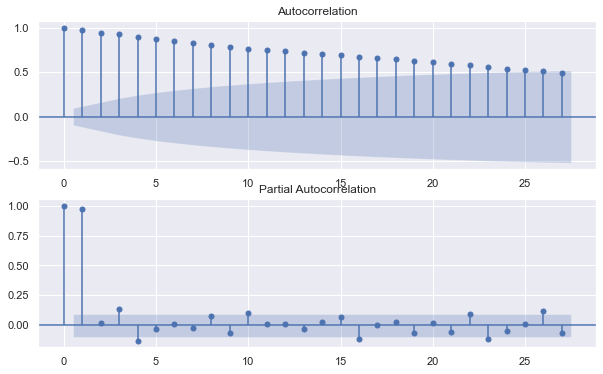

In [19]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig, ax = plt.subplots(2, figsize=(10,6))
ax[0]=plot_acf(df.iloc[:,5],ax=ax[0])
ax[1]=plot_pacf(df.iloc[:,5],ax=ax[1])

In [20]:
#Mengubah array menjadi data matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [21]:
time_step=4 #dilihat 5 lag terakhir yang keluar
X_train, Y_train = create_dataset(df_s[:training_size,:], time_step)
X_test, Y_test = create_dataset(df_s[training_size-time_step:,:], time_step)

In [22]:
print(X_train.shape), print(Y_train.shape)

(305, 4)
(305,)


(None, None)

In [23]:
#reshape input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [24]:
model = Sequential()
model.add(LSTM(145, return_sequences=False, input_shape=(time_step,1)))
model.add(Dense(65,activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae','mape','mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 145)               85260     
                                                                 
 dense (Dense)               (None, 65)                9490      
                                                                 
 dense_1 (Dense)             (None, 1)                 66        
                                                                 
Total params: 94,816
Trainable params: 94,816
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = model.fit(X_train, Y_train, epochs=30, verbose=1,batch_size=8,validation_data=(X_test,Y_test))

Epoch 1/30
39/39 [==============================] - 6s 39ms/step - loss: 0.0360 - mae: 0.1370 - mape: 304625.8750 - mse: 0.0360 - val_loss: 0.0076 - val_mae: 0.0733 - val_mape: 10.4249 - val_mse: 0.0076
Epoch 2/30
39/39 [==============================] - 0s 8ms/step - loss: 0.0066 - mae: 0.0621 - mape: 967481.8125 - mse: 0.0066 - val_loss: 0.0025 - val_mae: 0.0423 - val_mape: 7.0690 - val_mse: 0.0025
Epoch 3/30
39/39 [==============================] - 0s 8ms/step - loss: 0.0059 - mae: 0.0569 - mape: 791146.3125 - mse: 0.0059 - val_loss: 0.0023 - val_mae: 0.0414 - val_mape: 6.7727 - val_mse: 0.0023
Epoch 4/30
39/39 [==============================] - 0s 8ms/step - loss: 0.0061 - mae: 0.0573 - mape: 720612.8750 - mse: 0.0061 - val_loss: 0.0066 - val_mae: 0.0677 - val_mape: 9.7079 - val_mse: 0.0066
Epoch 5/30
39/39 [==============================] - 0s 8ms/step - loss: 0.0069 - mae: 0.0616 - mape: 761703.0000 - mse: 0.0069 - val_loss: 0.0041 - val_mae: 0.0537 - val_mape: 8.0217 - val_mse: 

<Figure size 432x288 with 0 Axes>

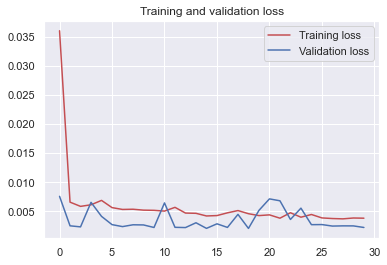

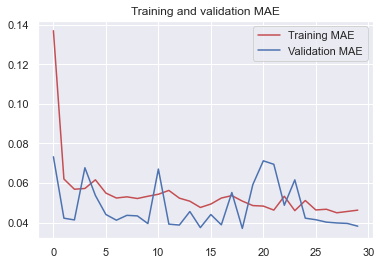

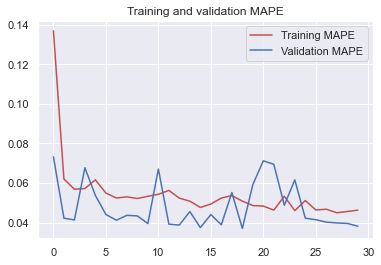

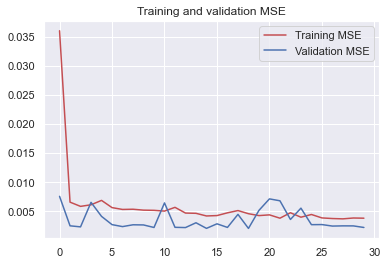

<Figure size 432x288 with 0 Axes>

In [26]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

loss=history.history['loss']
val_loss=history.history['val_loss']
mae=history.history['mae']
val_mae=history.history['val_mae']
mape=history.history['mape']
val_mape=history.history['val_mape']
mse=history.history['mse']
val_mse=history.history['val_mse']

epochs=range(len(loss))

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label ='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

plt.plot(epochs, mae, 'r', label = 'Training MAE')
plt.plot(epochs, val_mae, 'b', label ='Validation MAE')
plt.title('Training and validation MAE')
plt.legend()
plt.figure()

plt.plot(epochs, mae, 'r', label = 'Training MAPE')
plt.plot(epochs, val_mae, 'b', label ='Validation MAPE')
plt.title('Training and validation MAPE')
plt.legend()
plt.figure()

plt.plot(epochs, mse, 'r', label = 'Training MSE')
plt.plot(epochs, val_mse, 'b', label ='Validation MSE')
plt.title('Training and validation MSE')
plt.legend()
plt.figure()

In [27]:
test_predict = model.predict(X_test)

In [28]:
test_predict1 = scaler.inverse_transform(test_predict)
test_predict1

array([[3441.0369],
       [3414.8965],
       [3367.653 ],
       [3365.7996],
       [3323.3962],
       [3319.9866],
       [3371.067 ],
       [3279.8777],
       [3279.4114],
       [3207.8975],
       [3193.482 ],
       [3180.957 ],
       [3143.416 ],
       [3106.4355],
       [3076.6897],
       [3046.596 ],
       [3059.4756],
       [3041.6208],
       [3168.462 ],
       [3151.3093],
       [3103.9253],
       [3094.967 ],
       [3151.1084],
       [3187.2676],
       [3232.9517],
       [3232.156 ],
       [3273.405 ],
       [3202.7495],
       [3218.902 ],
       [3280.515 ],
       [3218.3665],
       [3252.9128],
       [3260.9856],
       [3313.9258],
       [3333.853 ],
       [3368.9346],
       [3350.4336],
       [3336.8848],
       [3282.5256],
       [3262.553 ],
       [3349.4285],
       [3312.5457],
       [3346.6377],
       [3407.8027],
       [3390.242 ],
       [3402.5256],
       [3433.1887],
       [3404.1384],
       [3382.5635],
       [3373.4705],


In [29]:
#RMSE
import math
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(np.mean(((test_predict1- df_p[training_size:])**2)))
rmse

Close    61.966221
dtype: float64

<ipython-input-30-e48f3cb14095>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = test_predict1


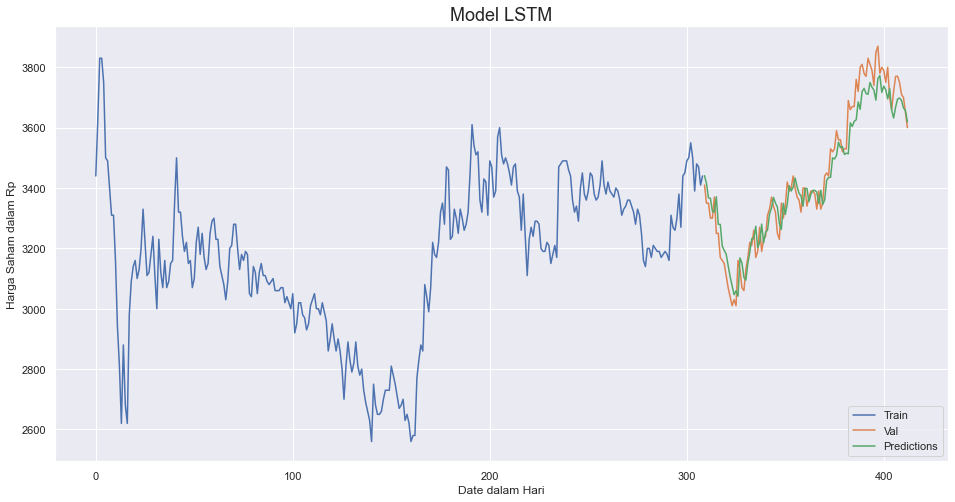

In [30]:
train = df[:training_size]
valid = df[training_size:]
valid['Predictions'] = test_predict1
plt.figure(figsize=(16,8))
plt.title('Model LSTM', fontsize=18)
plt.xlabel('Date dalam Hari', fontsize=12)
plt.ylabel('Harga Saham dalam Rp', fontsize=12)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend([ 'Train','Val', 'Predictions'], loc='lower right')
plt.show()

# Forecasting dengan RNN

In [31]:
model2 = Sequential()
model2.add(SimpleRNN(145, return_sequences=False, input_shape=(time_step,1)))
model2.add(Dense(65,activation='tanh'))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae','mape','mse'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 145)               21315     
                                                                 
 dense_2 (Dense)             (None, 65)                9490      
                                                                 
 dense_3 (Dense)             (None, 1)                 66        
                                                                 
Total params: 30,871
Trainable params: 30,871
Non-trainable params: 0
_________________________________________________________________


In [32]:
history_RNN = model2.fit(X_train, Y_train, epochs=30, verbose=1,batch_size=8,validation_data=(X_test,Y_test))

Epoch 1/30
39/39 [==============================] - 2s 17ms/step - loss: 0.0308 - mae: 0.1243 - mape: 947974.0000 - mse: 0.0308 - val_loss: 0.0022 - val_mae: 0.0383 - val_mape: 6.5938 - val_mse: 0.0022
Epoch 2/30
39/39 [==============================] - 0s 5ms/step - loss: 0.0044 - mae: 0.0481 - mape: 496647.0938 - mse: 0.0044 - val_loss: 0.0037 - val_mae: 0.0496 - val_mape: 7.1650 - val_mse: 0.0037
Epoch 3/30
39/39 [==============================] - 0s 5ms/step - loss: 0.0040 - mae: 0.0457 - mape: 448934.8125 - mse: 0.0040 - val_loss: 0.0018 - val_mae: 0.0349 - val_mape: 5.9713 - val_mse: 0.0018
Epoch 4/30
39/39 [==============================] - 0s 5ms/step - loss: 0.0039 - mae: 0.0479 - mape: 597168.5000 - mse: 0.0039 - val_loss: 0.0019 - val_mae: 0.0345 - val_mape: 5.4167 - val_mse: 0.0019
Epoch 5/30
39/39 [==============================] - 0s 5ms/step - loss: 0.0037 - mae: 0.0450 - mape: 432932.8125 - mse: 0.0037 - val_loss: 0.0040 - val_mae: 0.0509 - val_mape: 7.3144 - val_mse: 0

<Figure size 432x288 with 0 Axes>

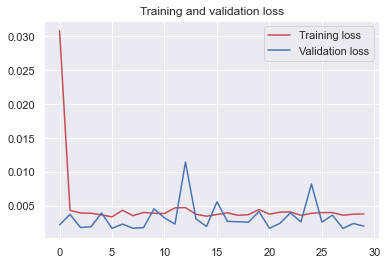

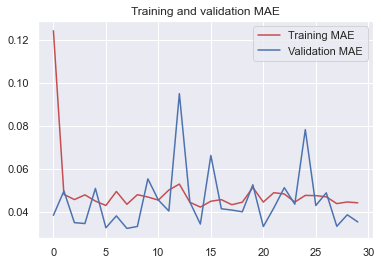

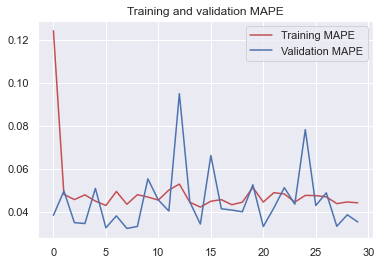

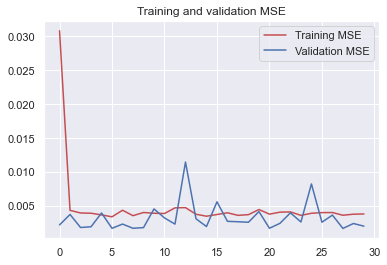

<Figure size 432x288 with 0 Axes>

In [33]:
loss=history_RNN.history['loss']
val_loss=history_RNN.history['val_loss']
mae=history_RNN.history['mae']
val_mae=history_RNN.history['val_mae']
mape=history_RNN.history['mape']
val_mape=history_RNN.history['val_mape']
mse=history_RNN.history['mse']
val_mse=history_RNN.history['val_mse']

epochs=range(len(loss))

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label ='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

plt.plot(epochs, mae, 'r', label = 'Training MAE')
plt.plot(epochs, val_mae, 'b', label ='Validation MAE')
plt.title('Training and validation MAE')
plt.legend()
plt.figure()

plt.plot(epochs, mae, 'r', label = 'Training MAPE')
plt.plot(epochs, val_mae, 'b', label ='Validation MAPE')
plt.title('Training and validation MAPE')
plt.legend()
plt.figure()

plt.plot(epochs, mse, 'r', label = 'Training MSE')
plt.plot(epochs, val_mse, 'b', label ='Validation MSE')
plt.title('Training and validation MSE')
plt.legend()
plt.figure()

In [34]:
test_predict_RNN = model2.predict(X_test)

In [35]:
test_predict2 = scaler.inverse_transform(test_predict_RNN)
test_predict2

array([[3433.9102],
       [3388.5928],
       [3352.489 ],
       [3350.5627],
       [3293.3381],
       [3306.9722],
       [3358.0242],
       [3244.0566],
       [3278.9675],
       [3168.24  ],
       [3183.3826],
       [3155.4756],
       [3126.1992],
       [3093.683 ],
       [3062.7158],
       [3033.4712],
       [3052.8362],
       [3027.142 ],
       [3176.1663],
       [3120.1074],
       [3109.3354],
       [3085.1294],
       [3138.9119],
       [3169.4846],
       [3228.2673],
       [3214.6057],
       [3270.0325],
       [3172.7285],
       [3217.6333],
       [3259.8613],
       [3189.892 ],
       [3255.9683],
       [3230.719 ],
       [3311.6414],
       [3317.9983],
       [3367.8606],
       [3332.4275],
       [3326.4888],
       [3253.8835],
       [3243.927 ],
       [3340.6218],
       [3280.2935],
       [3356.0532],
       [3397.4824],
       [3374.028 ],
       [3403.1335],
       [3421.8506],
       [3385.5596],
       [3373.14  ],
       [3354.2317],


In [36]:
#RMSE RNN
rmse_RNN=np.sqrt(np.mean(((test_predict2- df_p[training_size:])**2)))
rmse_RNN

Close    58.861739
dtype: float64

<ipython-input-37-fe03cbcd9349>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = test_predict2


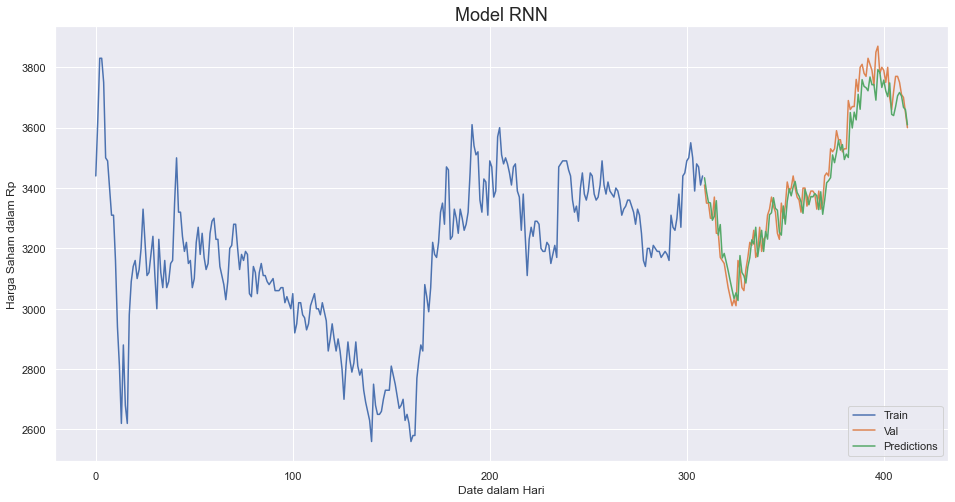

In [37]:
train = df[:training_size]
valid = df[training_size:]
valid['Predictions'] = test_predict2
plt.figure(figsize=(16,8))
plt.title('Model RNN', fontsize=18)
plt.xlabel('Date dalam Hari', fontsize=12)
plt.ylabel('Harga Saham dalam Rp', fontsize=12)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend([ 'Train','Val','Predictions'], loc='lower right')
plt.show()

<ipython-input-38-6422ed7508d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions_LSTM'] = test_predict1
<ipython-input-38-6422ed7508d1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions_RNN'] = test_predict2


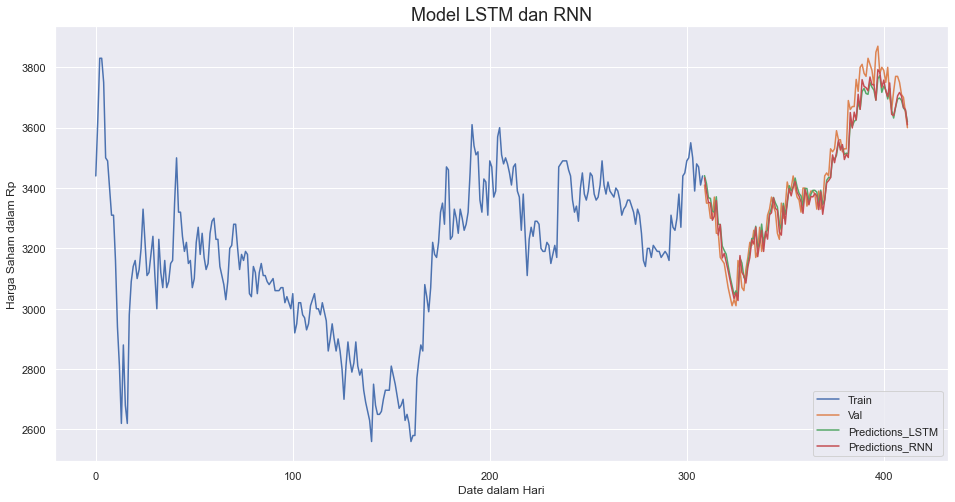

In [38]:
train = df[:training_size]
valid = df[training_size:]
valid['Predictions_LSTM'] = test_predict1
valid['Predictions_RNN'] = test_predict2
plt.figure(figsize=(16,8))
plt.title('Model LSTM dan RNN', fontsize=18)
plt.xlabel('Date dalam Hari', fontsize=12)
plt.ylabel('Harga Saham dalam Rp', fontsize=12)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions_LSTM','Predictions_RNN']])
plt.legend([ 'Train','Val','Predictions_LSTM','Predictions_RNN'], loc='lower right')
plt.show()

In [39]:
model.save("Forecasting LSTM")

INFO:tensorflow:Assets written to: Forecasting LSTM\assets


INFO:tensorflow:Assets written to: Forecasting LSTM\assets


In [40]:
model2.save("Forecasting RNN")

INFO:tensorflow:Assets written to: Forecasting RNN\assets


INFO:tensorflow:Assets written to: Forecasting RNN\assets


In [44]:
from tensorflow.keras.models import load_model
model2=load_model("Forecasting RNN")
test_predict_RNN = model2.predict(X_test)